In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from random import shuffle
from skimage.io import imread
from skimage.transform import resize

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [2]:
#This function takes the image name and the two pattern names to test and return 0 if pat1 is in im_name and 1 
#if pat2 is in im_name
def gen_labels(im_name, pat1, pat2):
 
    if pat1 in im_name:
         label = np.array([0])
     
    elif pat2 in im_name:
         label = np.array([1])
     
    return label


#the function creates a list which associates each image with its corresponding label
def get_data(data_path, data_list, img_h, img_w):
     
    img_labels = []
    
    for item in enumerate(data_list):
        img = imread(os.path.join(data_path, item[1]), as_gray = True) # "as_grey"
        #each image is resized so as all image have the same dimension for the process
        img = resize(img, (img_h, img_w), anti_aliasing = True).astype('float32')
        img_labels.append([np.array(img), gen_labels(item[1], 'Mel', 'Nev')])

        if item[0] % 100 == 0:
            print('Reading: {0}/{1} of train images'.format(item[0], len(data_list)))

    shuffle(img_labels)
    return img_labels


#separates the list img_labels obtained with the function get_data into two lists
#one list with the images and one list with the labels
def get_data_arrays(nested_list, img_h, img_w):
    img_arrays = np.zeros((len(nested_list), img_h, img_w), dtype = np.float32)
    label_arrays = np.zeros((len(nested_list)), dtype = np.int32)
    for ind in range(len(nested_list)):
        img_arrays[ind] = nested_list[ind][0]
        label_arrays[ind] = nested_list[ind][1]
    img_arrays = np.expand_dims(img_arrays, axis =3)
    return img_arrays, label_arrays


#this function uses all the previous functions to create a train set and a test set 
def get_train_test_arrays(train_data_path, test_data_path, train_list,test_list, img_h, img_w):
    train_data = get_data(train_data_path, train_list, img_h, img_w)
    test_data = get_data(test_data_path, test_list, img_h, img_w)

    train_img, train_label = get_data_arrays(train_data, img_h, img_w)
    test_img, test_label = get_data_arrays(test_data, img_h, img_w)
    del(train_data)
    del(test_data)
    return train_img, test_img, train_label, test_label


In [3]:
img_w, img_h = 128, 128 # Setting the width and heights of the images.
data_path = 'DL_course_data/Lab1/Skin/' # Path to data root with two subdirs.
train_data_path = os.path.join(data_path, 'train')
test_data_path = os.path.join(data_path, 'test')
train_list = os.listdir(train_data_path)
test_list = os.listdir(test_data_path)

#creating the sets
x_train, x_test, y_train, y_test = get_train_test_arrays(train_data_path, test_data_path,train_list, test_list, img_h, img_w)

Reading: 0/1000 of train images
Reading: 100/1000 of train images
Reading: 200/1000 of train images
Reading: 300/1000 of train images
Reading: 400/1000 of train images
Reading: 500/1000 of train images
Reading: 600/1000 of train images
Reading: 700/1000 of train images
Reading: 800/1000 of train images
Reading: 900/1000 of train images
Reading: 0/200 of train images
Reading: 100/200 of train images


In [4]:
def four_layer_model(img_width, img_height, base_dense):
    #img_ch=1 in gray images
    input_size = (img_width, img_height,1)
    
    inputs_layer = Input(shape=input_size, name='input_layer')
    flat=Flatten()(inputs_layer)
    
    layer1=Dense(base_dense,activation='relu')(flat)
    
    layer2=Dense(base_dense//2,activation='relu')(layer1)
    
    layer3=Dense(base_dense//4,activation='relu')(layer2)
    
    out=Dense(1,activation='sigmoid')(layer3)
    
    clf = Model(inputs=inputs_layer, outputs=out)
    
    clf.summary()

    return clf

In [5]:
#data 
n_epochs=150
batch_size=16
base_dense=64
lr=0.0001


In [6]:
#run the four_layer_model
clf=four_layer_model(img_w, img_h,base_dense)
clf.compile(loss='binary_crossentropy',optimizer = SGD(lr),metrics=['binary_accuracy'])
clf_hist=clf.fit(x_train,y_train,batch_size,n_epochs,validation_data=(x_test, y_test))

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 128, 128, 1)]     0         
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1048640   
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 1,051,265
Trainable params: 1,051,265
Non-trainable params: 0
___________________________________________________

Epoch 44/150
1000/1000 [==============================] - 0s 284us/sample - loss: 0.6525 - binary_accuracy: 0.6710 - val_loss: 0.6542 - val_binary_accuracy: 0.7100
Epoch 45/150
1000/1000 [==============================] - 0s 283us/sample - loss: 0.6529 - binary_accuracy: 0.6740 - val_loss: 0.6558 - val_binary_accuracy: 0.6500
Epoch 46/150
1000/1000 [==============================] - 0s 284us/sample - loss: 0.6512 - binary_accuracy: 0.6680 - val_loss: 0.6538 - val_binary_accuracy: 0.6700
Epoch 47/150
1000/1000 [==============================] - 0s 286us/sample - loss: 0.6514 - binary_accuracy: 0.6760 - val_loss: 0.6547 - val_binary_accuracy: 0.6850
Epoch 48/150
1000/1000 [==============================] - 0s 286us/sample - loss: 0.6512 - binary_accuracy: 0.6790 - val_loss: 0.6531 - val_binary_accuracy: 0.7000
Epoch 49/150
1000/1000 [==============================] - 0s 312us/sample - loss: 0.6492 - binary_accuracy: 0.6920 - val_loss: 0.6555 - val_binary_accuracy: 0.6300
Epoch 50/150
100

Epoch 94/150
1000/1000 [==============================] - 0s 273us/sample - loss: 0.6252 - binary_accuracy: 0.6950 - val_loss: 0.6380 - val_binary_accuracy: 0.6900
Epoch 95/150
1000/1000 [==============================] - 0s 275us/sample - loss: 0.6249 - binary_accuracy: 0.6840 - val_loss: 0.6390 - val_binary_accuracy: 0.6700
Epoch 96/150
1000/1000 [==============================] - 0s 273us/sample - loss: 0.6254 - binary_accuracy: 0.6890 - val_loss: 0.6411 - val_binary_accuracy: 0.6550
Epoch 97/150
1000/1000 [==============================] - 0s 273us/sample - loss: 0.6254 - binary_accuracy: 0.6830 - val_loss: 0.6409 - val_binary_accuracy: 0.6600
Epoch 98/150
1000/1000 [==============================] - 0s 276us/sample - loss: 0.6225 - binary_accuracy: 0.6750 - val_loss: 0.6335 - val_binary_accuracy: 0.7100
Epoch 99/150
1000/1000 [==============================] - 0s 273us/sample - loss: 0.6236 - binary_accuracy: 0.7010 - val_loss: 0.6331 - val_binary_accuracy: 0.7100
Epoch 100/150
10

Epoch 144/150
1000/1000 [==============================] - 0s 311us/sample - loss: 0.6081 - binary_accuracy: 0.7040 - val_loss: 0.6236 - val_binary_accuracy: 0.7200
Epoch 145/150
1000/1000 [==============================] - 0s 317us/sample - loss: 0.6052 - binary_accuracy: 0.7020 - val_loss: 0.6282 - val_binary_accuracy: 0.6800
Epoch 146/150
1000/1000 [==============================] - 0s 314us/sample - loss: 0.6066 - binary_accuracy: 0.7000 - val_loss: 0.6271 - val_binary_accuracy: 0.7000
Epoch 147/150
1000/1000 [==============================] - 0s 313us/sample - loss: 0.6069 - binary_accuracy: 0.7000 - val_loss: 0.6244 - val_binary_accuracy: 0.7100
Epoch 148/150
1000/1000 [==============================] - 0s 314us/sample - loss: 0.6067 - binary_accuracy: 0.6940 - val_loss: 0.6235 - val_binary_accuracy: 0.7200
Epoch 149/150
1000/1000 [==============================] - 0s 312us/sample - loss: 0.6056 - binary_accuracy: 0.7000 - val_loss: 0.6255 - val_binary_accuracy: 0.6900
Epoch 150/

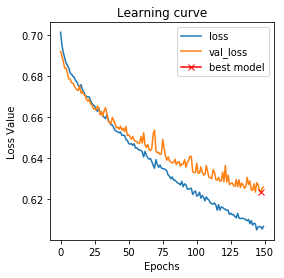

In [7]:
#plot the loss function for test and train set

%matplotlib inline

plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(clf_hist.history["loss"], label="loss")
plt.plot(clf_hist.history["val_loss"], label="val_loss")
plt.plot( np.argmin(clf_hist.history["val_loss"]),
 np.min(clf_hist.history["val_loss"]),
 marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend(); 

Task5 Convolutional model


In [8]:
def conv_model(img_ch, img_width, img_height):
    
    model = Sequential()
    model.add(Conv2D(base, kernel_size = (3, 3), activation='relu',
    strides=1, padding='same',
    input_shape = (img_width, img_height, img_ch)))
    
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(base*2, kernel_size = (3, 3), activation='relu',
    strides=1, padding='same'))
    
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    
    model.add(Dense(base*2, activation='relu'))
    
    model.add(Dense(1, activation='sigmoid'))
    
    model.summary()

    return model

In [15]:
#data
n_epochs=200
batch_size=8
base=32
lr=0.0001

In [16]:
#run the conv_model
#img_ch is also 1 but also corresponds to the third dimension of the images

clf=conv_model(np.shape(x_train)[3],img_w,img_h)
clf.compile(loss='binary_crossentropy',optimizer = SGD(lr),metrics=['binary_accuracy'])
clf_hist=clf.fit(x_train,y_train,batch_size,n_epochs,validation_data=(x_test, y_test))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 128, 128, 32)      320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 65536)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4194368   
_________________________________________________________________
dense_9 (Dense)              (None, 1)                

1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6817 - binary_accuracy: 0.6120 - val_loss: 0.6815 - val_binary_accuracy: 0.6850
Epoch 44/200
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6817 - binary_accuracy: 0.6420 - val_loss: 0.6811 - val_binary_accuracy: 0.7150
Epoch 45/200
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6813 - binary_accuracy: 0.6410 - val_loss: 0.6809 - val_binary_accuracy: 0.7000
Epoch 46/200
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6805 - binary_accuracy: 0.6390 - val_loss: 0.6810 - val_binary_accuracy: 0.5550
Epoch 47/200
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6808 - binary_accuracy: 0.5840 - val_loss: 0.6804 - val_binary_accuracy: 0.7150
Epoch 48/200
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6803 - binary_accuracy: 0.6600 - val_loss: 0.6803 - val_binary_accuracy: 0.5850
Epoch 49/200
1000/1000 [=================

1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6684 - binary_accuracy: 0.6530 - val_loss: 0.6686 - val_binary_accuracy: 0.6800
Epoch 94/200
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6680 - binary_accuracy: 0.6620 - val_loss: 0.6683 - val_binary_accuracy: 0.6950
Epoch 95/200
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6679 - binary_accuracy: 0.6570 - val_loss: 0.6679 - val_binary_accuracy: 0.7200
Epoch 96/200
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6674 - binary_accuracy: 0.6720 - val_loss: 0.6677 - val_binary_accuracy: 0.7050
Epoch 97/200
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6673 - binary_accuracy: 0.6830 - val_loss: 0.6673 - val_binary_accuracy: 0.7200
Epoch 98/200
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6669 - binary_accuracy: 0.6690 - val_loss: 0.6671 - val_binary_accuracy: 0.7250
Epoch 99/200
1000/1000 [=================

1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6515 - binary_accuracy: 0.6760 - val_loss: 0.6541 - val_binary_accuracy: 0.7100
Epoch 144/200
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6516 - binary_accuracy: 0.6780 - val_loss: 0.6537 - val_binary_accuracy: 0.7100
Epoch 145/200
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6509 - binary_accuracy: 0.6850 - val_loss: 0.6542 - val_binary_accuracy: 0.6950
Epoch 146/200
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6507 - binary_accuracy: 0.6810 - val_loss: 0.6531 - val_binary_accuracy: 0.7100
Epoch 147/200
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6500 - binary_accuracy: 0.6910 - val_loss: 0.6529 - val_binary_accuracy: 0.7050
Epoch 148/200
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6500 - binary_accuracy: 0.6780 - val_loss: 0.6525 - val_binary_accuracy: 0.7050
Epoch 149/200
1000/1000 [===========

1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6324 - binary_accuracy: 0.6990 - val_loss: 0.6402 - val_binary_accuracy: 0.6800
Epoch 194/200
1000/1000 [==============================] - 1s 916us/sample - loss: 0.6326 - binary_accuracy: 0.6920 - val_loss: 0.6413 - val_binary_accuracy: 0.6900
Epoch 195/200
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6311 - binary_accuracy: 0.6780 - val_loss: 0.6392 - val_binary_accuracy: 0.7200
Epoch 196/200
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6304 - binary_accuracy: 0.6900 - val_loss: 0.6417 - val_binary_accuracy: 0.6900
Epoch 197/200
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6325 - binary_accuracy: 0.6940 - val_loss: 0.6384 - val_binary_accuracy: 0.7100
Epoch 198/200
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6314 - binary_accuracy: 0.6930 - val_loss: 0.6388 - val_binary_accuracy: 0.6900
Epoch 199/200
1000/1000 [=========

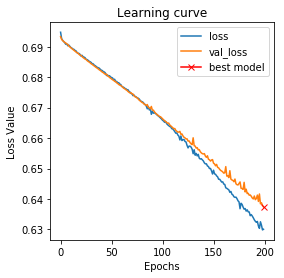

In [17]:
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(clf_hist.history["loss"], label="loss")
plt.plot(clf_hist.history["val_loss"], label="val_loss")
plt.plot( np.argmin(clf_hist.history["val_loss"]),
 np.min(clf_hist.history["val_loss"]),
 marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend(); 
